In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import os
import seaborn as sns
from sklearn.metrics import *

In [2]:
model_name = ['ann', 'dt', 'rf', 'nb', 'knn', 'svm', 'dnn', 'ednn']

In [3]:
file = os.listdir('Results')
file

['ann_fold_pred.pkl',
 'ann_fold_test.pkl',
 'DNN.png',
 'DNN.txt',
 'dnn_fold_pred.pkl',
 'dnn_fold_test.pkl',
 'dt_fold_pred.pkl',
 'dt_fold_prob.pkl',
 'dt_fold_test.pkl',
 'ednn_fold_pred.pkl',
 'ednn_fold_test.pkl',
 'IMG',
 'knn_fold_pred.pkl',
 'knn_fold_prob.pkl',
 'knn_fold_test.pkl',
 'nb_fold_pred.pkl',
 'nb_fold_prob.pkl',
 'nb_fold_test.pkl',
 'Proposed Model.png',
 'Proposed Model.txt',
 'rf_fold_pred.pkl',
 'rf_fold_prob.pkl',
 'rf_fold_test.pkl',
 'svm_fold_pred.pkl',
 'svm_fold_prob.pkl',
 'svm_fold_test.pkl']

In [155]:
k = model_name[5]
pkl = open(f'Results/{k}_fold_pred.pkl', 'rb')
pkl2 = open(f'Results/{k}_fold_test.pkl', 'rb')
if k != 'dnn' or k != 'ednn' or k != 'ann':
    pkl3 = open(f'Results/{k}_fold_prob.pkl', 'rb')
    fold_prob = pickle.load(pkl3)   
fold_pred = pickle.load(pkl)
fold_test = pickle.load(pkl2)

In [156]:
fold_pred[0][0]

array([0., 0., 0., 0., 0., 0., 0.])

In [157]:
prob_array = []
for j in range(10):
    prob_temp = []
    for i in range(7):
        n = fold_prob[j][i]
        tm = n[:, 1].reshape((len(n), 1))
        if len(n) != 54378:
            tm = np.vstack((tm, np.ones((1))))
        prob_temp.append(tm)
    for i in range(7):
        prob_c = np.concatenate(prob_temp, axis=1)
    prob_array.append(prob_c)


In [158]:
for i in range(7):
    print(prob_array[i].shape)

(54378, 7)
(54378, 7)
(54378, 7)
(54378, 7)
(54378, 7)
(54378, 7)
(54378, 7)


In [159]:
prob_array[0]

array([[0.95026414, 0.95898899, 0.88007572, ..., 0.83996071, 0.48473501,
        0.53681795],
       [0.95073232, 0.95488693, 0.90401231, ..., 0.84929367, 0.45982824,
        0.53312762],
       [0.95246868, 0.87586762, 0.94184681, ..., 0.92302433, 0.64733541,
        0.58070912],
       ...,
       [0.95101175, 0.93153074, 0.95039631, ..., 0.88620129, 0.63322915,
        0.56884208],
       [0.94990456, 0.95660606, 0.91075212, ..., 0.88659881, 0.54729672,
        0.53874561],
       [0.95236895, 0.88512554, 0.95724765, ..., 0.92497013, 0.6089553 ,
        0.56317979]])

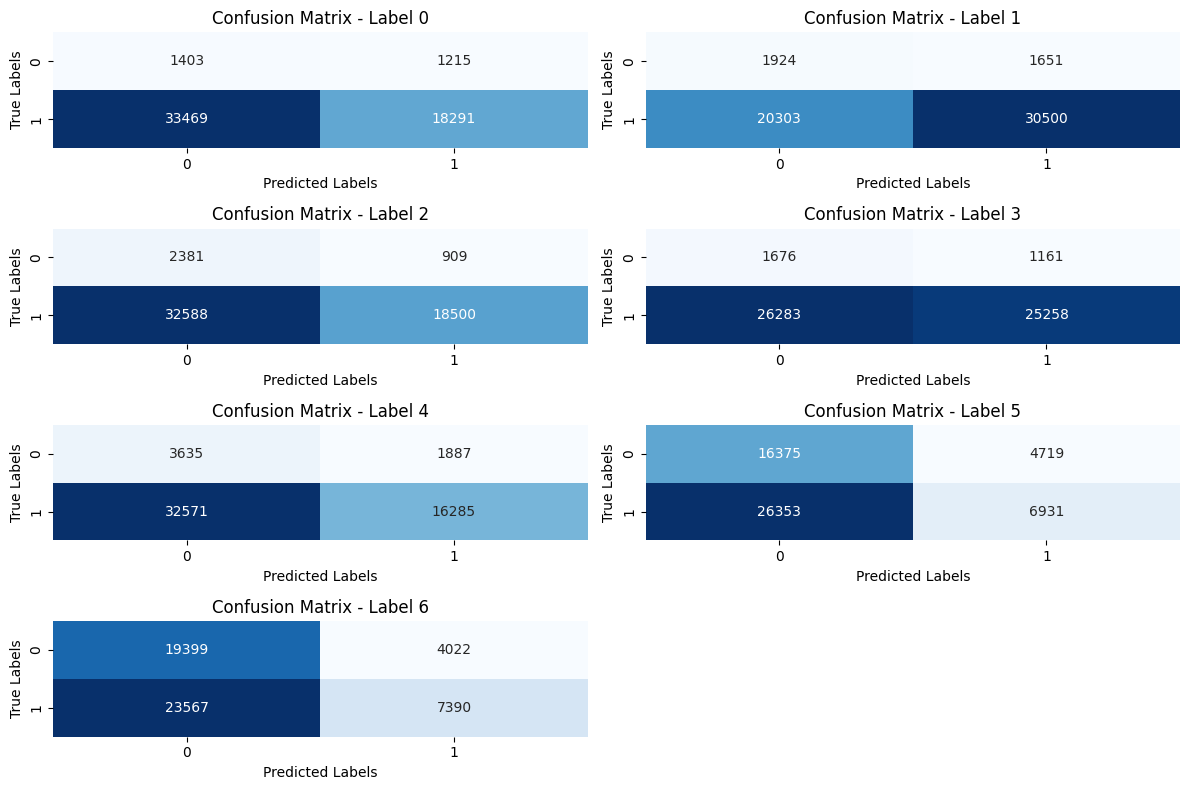

In [160]:
cm = multilabel_confusion_matrix(fold_test[0].round(), fold_pred[0].round())

# Determine the grid dimensions for subplots
num_labels = cm.shape[0]
cols = min(num_labels, 2)
rows = (num_labels + cols - 1) // cols

# Plot confusion matrix
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
for i, (matrix, ax) in enumerate(zip(cm, axes.ravel())):
    sns.heatmap(matrix, annot=True, fmt="d", cbar=False, cmap='Blues', ax=ax)
    ax.set_title(f"Confusion Matrix - Label {i}")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")

# Remove unused subplots if necessary
if num_labels < rows * cols:
    for j in range(num_labels, rows * cols):
        fig.delaxes(axes.ravel()[j])

plt.tight_layout()
plt.savefig(f'Results/IMG/{k}_CM.png')
plt.show()

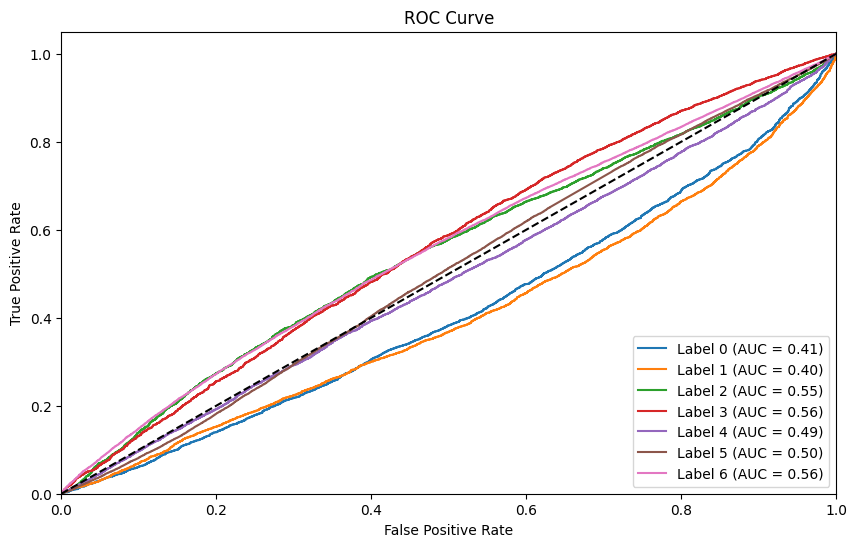

In [161]:
plt.figure(figsize=(10, 6))
roc_auc_per_label = dict()
#predictions=preds
for i in range(prob_array[0].shape[1]):
    fpr, tpr, _ = roc_curve(fold_test[0][:, i], prob_array[0][:, i])
    roc_auc_per_label[i] = roc_auc_score(fold_test[0][:, i], prob_array[0][:, i])
    plt.plot(fpr, tpr, label='Label %d (AUC = %0.2f)' % (i, roc_auc_per_label[i]))
# Plot ROC curve for each label
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig(f'Results/IMG/{k}_ROC.png')
plt.show()

In [162]:
prob_array[0].shape[1]

7